**Heart Failure Prediction**

In [ ]:

# Importing library
import pandas as pd

In [ ]:

def load_heart_data(Heart_PATH):
 return pd.read_csv(Heart_PATH)

heart = load_heart_data("/content/drive/MyDrive/AI Regression _Model/heart_failure_clinical_records_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart.info()

# check total_bedrooms as we  can see that it has missing values
# check the ocean_proximity. Its in object so it must be categorical value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart["serum_sodium"].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64

In [ ]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


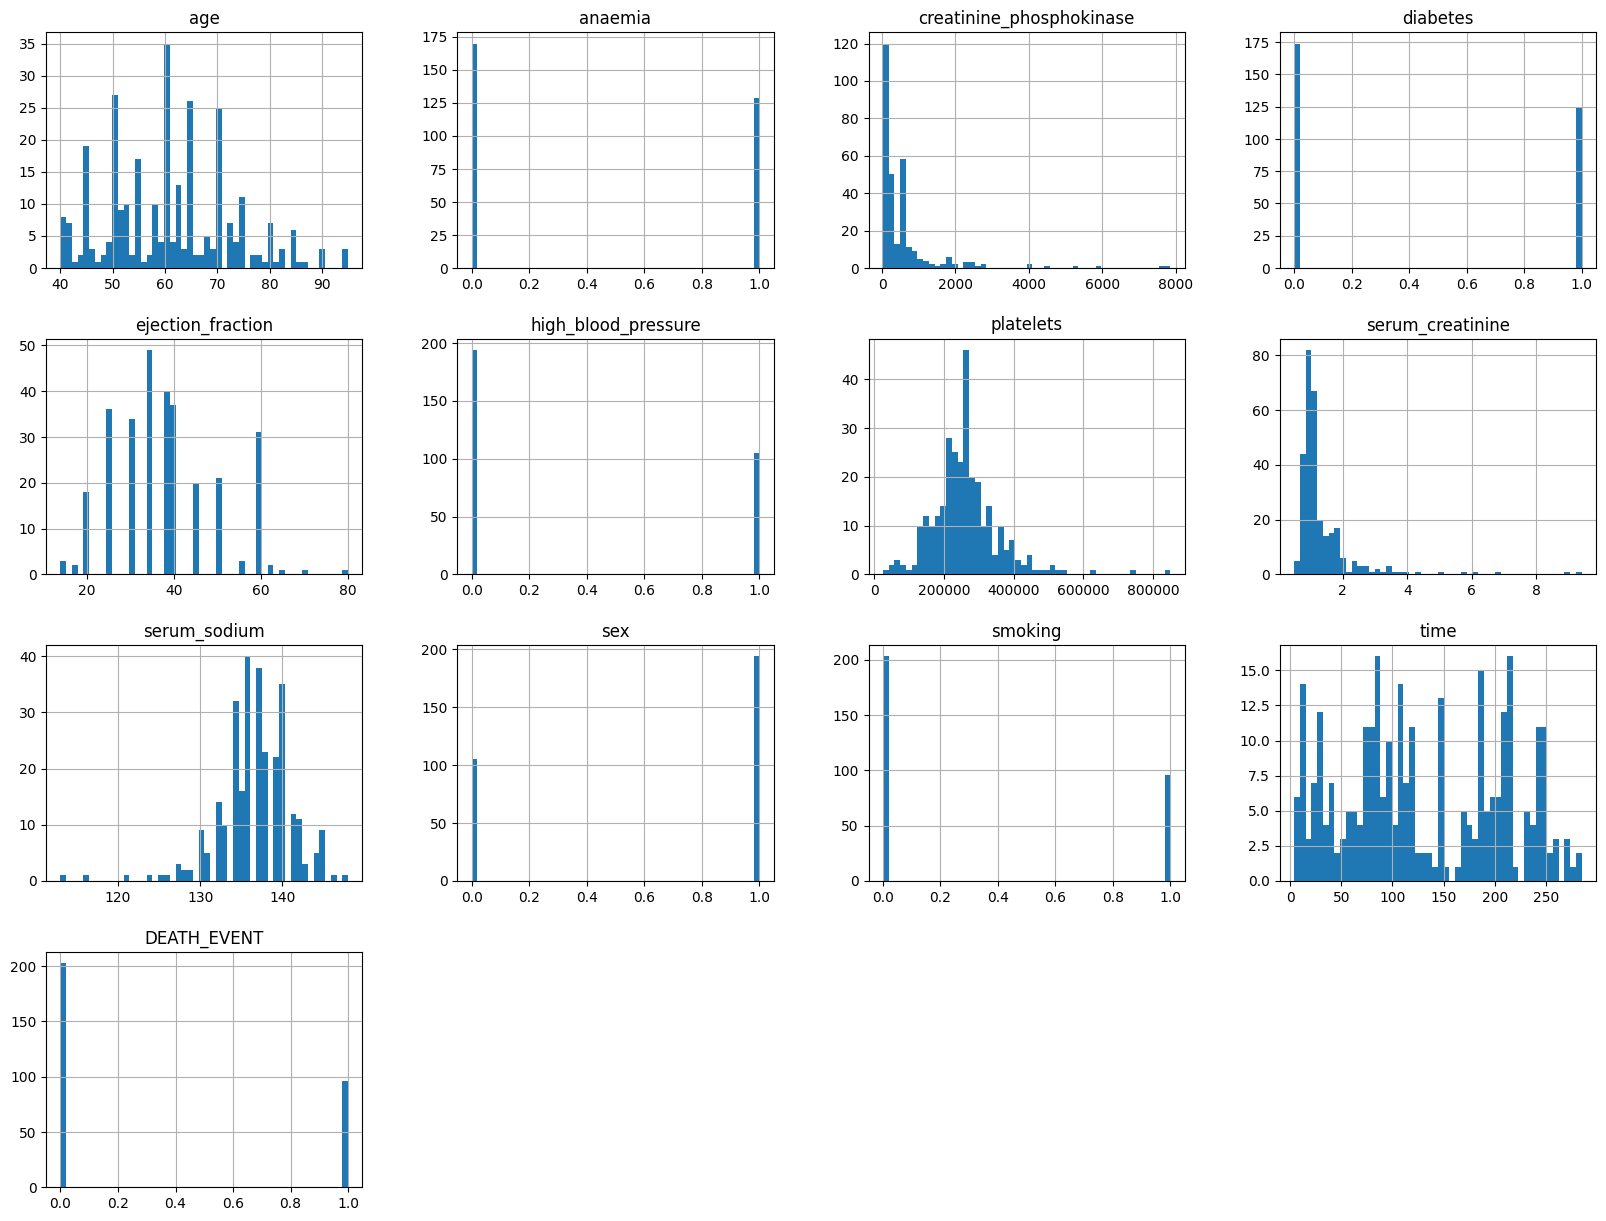

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
heart.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
# Things you notice in hist
# foremost notice that distribution are not in the bell curve so transfor that to bell curve

**Split dataset into train and test**

In [ ]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(heart, test_size=0.2, random_state=42)

In [ ]:

# why this may be some expert can suggest that median income can be most important features
import numpy as np
heart["age"] = pd.cut(heart["platelets"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

<Axes: >

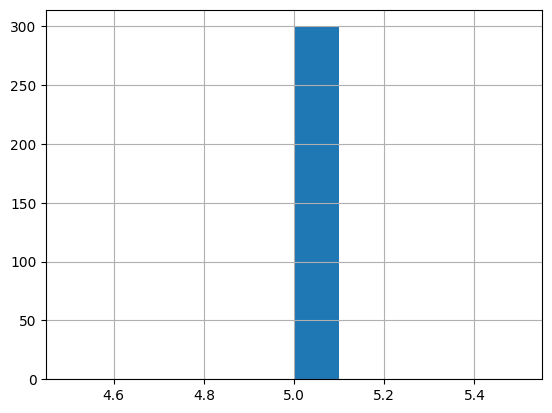

In [ ]:
heart["age"].hist()

**Startified Sampling**

In [ ]:

# equal distribution of the dataset in train and test
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(heart, heart["age"]):
 strat_train_set = heart.loc[train_index]
 strat_test_set = heart.loc[test_index]


In [ ]:
strat_test_set["age"].value_counts() / len(strat_test_set)

5    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: age, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("age", axis=1, inplace=True)

In [ ]:
heart = strat_train_set.copy()

In [ ]:
corr_matrix = heart.corr()

# check the correlation in descending order
corr_matrix["time"].sort_values(ascending=False)

<ipython-input-25-1f266a5f869c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart.corr()


time                        1.000000
serum_sodium                0.120553
creatinine_phosphokinase    0.058988
diabetes                    0.046419
ejection_fraction           0.028412
platelets                  -0.003646
sex                        -0.029638
smoking                    -0.060460
anaemia                    -0.123628
serum_creatinine           -0.201492
high_blood_pressure        -0.214725
DEATH_EVENT                -0.539653
Name: time, dtype: float64

In [ ]:

# creating own features and  check whether its correlation
heart["creatinine_phosphokinase"] = heart["anaemia"]/heart["ejection_fraction"]
heart["platelets"] = heart["serum_creatinine"]/heart["anaemia"]
heart["smoking"]=heart["sex"]/heart["ejection_fraction"]


# checking over the correlation of median house price with other features
corr_matrix = heart.corr()
corr_matrix["time"].sort_values(ascending=False)

<ipython-input-27-e80aaa275136>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart.corr()


time                        1.000000
serum_sodium                0.120553
diabetes                    0.046419
ejection_fraction           0.028412
sex                        -0.029638
smoking                    -0.073250
anaemia                    -0.123628
creatinine_phosphokinase   -0.137051
serum_creatinine           -0.201492
high_blood_pressure        -0.214725
platelets                  -0.294123
DEATH_EVENT                -0.539653
Name: time, dtype: float64

**Prepare dataset for model**

In [ ]:
# separate it for the input X and label Y
heart = strat_train_set.drop("platelets", axis=1)
heart_labels = strat_train_set["platelets"].copy()

**Data cleaning**

In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
#drop the categorical value
heart_num = heart.drop("creatinine_phosphokinase", axis=1)
imputer.fit(heart_num)

print(imputer.statistics_)
print(heart_num.median().values)


[  0.    0.   38.    0.    1.1 137.    1.    0.  115.    0.    5. ]
[  0.    0.   38.    0.    1.1 137.    1.    0.  115.    0. ]


<ipython-input-33-379d05440162>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(heart_num.median().values)


In [ ]:
X = imputer.transform(heart_num)
heart_tr = pd.DataFrame(X, columns=heart_num.columns,
 index=heart_num.index)

In [ ]:
heart_tr

,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,income_cat
196,0.0,1.0,38.0,1.0,1.18,137.0,0.0,0.0,185.0,0.0,5.0
51,1.0,0.0,20.0,1.0,1.40,139.0,0.0,0.0,43.0,1.0,5.0
73,0.0,1.0,50.0,0.0,1.30,137.0,1.0,1.0,72.0,0.0,5.0
194,0.0,0.0,20.0,1.0,1.60,135.0,1.0,0.0,180.0,1.0,5.0
126,0.0,1.0,17.0,1.0,2.10,124.0,0.0,0.0,100.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,50.0,1.0,1.10,148.0,1.0,0.0,209.0,0.0,5.0
155,1.0,1.0,25.0,0.0,1.70,140.0,1.0,0.0,120.0,0.0,5.0
81,0.0,0.0,50.0,0.0,1.18,137.0,1.0,1.0,76.0,0.0,5.0
272,0.0,0.0,38.0,0.0,1.20,133.0,0.0,0.0,245.0,0.0,5.0


**Handling Text and Categorical Attributes**

In [ ]:
age = heart[["anaemia"]]
age.head(10)

,anaemia
196,0
51,1
73,0
194,0
126,0
76,0
129,1
19,1
154,1
35,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
age_encoded = ordinal_encoder.fit_transform(age)
age_encoded[:10]


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [ ]:
heart_num

,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,income_cat
196,0,1,38,1,1.18,137,0,0,185,0,5
51,1,0,20,1,1.40,139,0,0,43,1,5
73,0,1,50,0,1.30,137,1,1,72,0,5
194,0,0,20,1,1.60,135,1,0,180,1,5
126,0,1,17,1,2.10,124,0,0,100,1,5
...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,50,1,1.10,148,1,0,209,0,5
155,1,1,25,0,1.70,140,1,0,120,0,5
81,0,0,50,0,1.18,137,1,1,76,0,5
272,0,0,38,0,1.20,133,0,0,245,0,5


**Transformation pipeline**

In [ ]:
list(heart_num)

['anaemia',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT',
 'income_cat']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])



heart_num_tr = num_pipeline.fit_transform(heart_num)



In [ ]:
heart_num_tr

array([[-0.87026027,  1.18917678,  0.02837836, ...,  0.69242543,
        -0.70267347,  0.        ],
       [ 1.14908152, -0.84091787, -1.49766774, ..., -1.13278111,
         1.42313613,  0.        ],
       [-0.87026027,  1.18917678,  1.04574242, ..., -0.76002766,
        -0.70267347,  0.        ],
       ...,
       [-0.87026027, -0.84091787,  1.04574242, ..., -0.7086134 ,
        -0.70267347,  0.        ],
       [-0.87026027, -0.84091787,  0.02837836, ...,  1.46363946,
        -0.70267347,  0.        ],
       [-0.87026027,  1.18917678,  0.19793903, ...,  1.4893466 ,
        -0.70267347,  0.        ]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(heart_num)
cat_attribs = ["anaemia"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])


heart_prepared = full_pipeline.fit_transform(heart)


**Training and evaluating on the training set**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(heart_prepared, heart_labels)

LinearRegression()

In [ ]:

some_data = heart.iloc[:5]
some_labels = heart_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [300760.89148836 253011.28192898 306695.51171485 217397.46264687
 262551.1370783 ]
Labels: [263358.03, 418000.0, 149000.0, 126000.0, 271000.0]


In [ ]:

from sklearn.metrics import mean_squared_error
heart_predictions = lin_reg.predict(heart_prepared)
lin_mse = mean_squared_error(heart_labels, heart_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

97767.03637510116

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(heart_prepared, heart_labels)


DecisionTreeRegressor()

In [ ]:

# Overfit problem

heart_predictions = tree_reg.predict(heart_prepared)
tree_mse = mean_squared_error(heart_labels, heart_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Cross-validation**

In [ ]:
# Better Evaluation Using Cross-Validation
# k fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, heart_prepared, heart_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [180063.76142407 160284.6179457  112816.42312235 131219.30804032
 153514.65576567 159116.54467932 190344.78944562 101063.1101642
  99673.32839349 137337.41949491]
Mean: 142543.39584756506
Standard deviation: 30000.044460939334


In [ ]:

lin_scores = cross_val_score(lin_reg, heart_prepared, heart_labels,
            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
 display_scores(lin_rmse_scores)

Scores: [123068.50321801  99906.86233354  77110.83512178  77189.62514365
 102714.77737183 120026.567893   138377.41096506  98268.71634686
  85707.55725956  84816.66520452]
Mean: 100718.75208578163
Standard deviation: 19723.816993336874


In [ ]:

# Random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(heart_prepared, heart_labels)

RandomForestRegressor()

In [ ]:
# Overfit problem
# without cross validation
heart_predictions = forest_reg.predict(heart_prepared)
random_forest_mse = mean_squared_error(heart_labels, heart_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_rmse

40375.35298293583

In [ ]:

# with cross validation
random_forest_scores = cross_val_score(forest_reg, heart_prepared, heart_labels,
            scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)

In [ ]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(random_forest_rmse_scores)

Scores: [122604.64087256 104227.84108563  87801.78120934  91069.68361207
 105610.06406027 114650.68066151 150387.11744805  99546.74845931
  84741.88281269  91218.78711765]
Mean: 105185.92273390833
Standard deviation: 18930.281877803918


**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(heart_prepared, heart_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:

grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:

grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

123454.69036327284 {'max_features': 2, 'n_estimators': 3}
108801.74125205827 {'max_features': 2, 'n_estimators': 10}
106541.59726813655 {'max_features': 2, 'n_estimators': 30}
117864.52240443358 {'max_features': 4, 'n_estimators': 3}
111744.67855624968 {'max_features': 4, 'n_estimators': 10}
106478.69407638174 {'max_features': 4, 'n_estimators': 30}
117854.12043510008 {'max_features': 6, 'n_estimators': 3}
111732.5197957512 {'max_features': 6, 'n_estimators': 10}
111165.17613689117 {'max_features': 6, 'n_estimators': 30}
123348.15849515767 {'max_features': 8, 'n_estimators': 3}
112810.51867080209 {'max_features': 8, 'n_estimators': 10}
110423.34574387327 {'max_features': 8, 'n_estimators': 30}
126151.3881406475 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
110894.596006996 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
127500.66279764465 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
114691.79573633887 {'bootstrap': False, 'max_features': 3, 'n_est

In [ ]:

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01528524, 0.04094152, 0.13331921, 0.03141502, 0.18265993,
       0.18811311, 0.0420046 , 0.0365631 , 0.26314699, 0.02349354,
       0.        , 0.02065893, 0.02239881])

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
final_model

RandomForestRegressor(max_features=4, n_estimators=30)

**test model in testing set**

In [ ]:

X_test = strat_test_set.drop("serum_creatinine", axis=1)
y_test = strat_test_set["serum_creatinine"].copy()
X_test_prepared = full_pipeline.transform(X_test)


In [ ]:

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [ ]:
final_rmse

 **save model**

In [ ]:

import joblib
joblib.dump(final_model, "my_model.pkl")

['my_model.pkl']